# Preliminaries

In [1]:
import os
#can change Theano settings. It is much (!) faster on a GPU
os.environ["THEANO_FLAGS"] = "mode=FAST_RUN,device=gpu,floatX=float32,"

In [2]:
import importlib
from imp import reload
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
from network_code import data_handling as dat
from network_code import predictive_network_subclasses as pn
from network_code import visualisation as vis
reload(dat)
reload(vis)
reload(pn)
%matplotlib inline

WARNING (theano.sandbox.cuda): The cuda backend is deprecated and will be removed in the next release (v0.10).  Please switch to the gpuarray backend. You can get more information about how to switch at this URL:
 https://github.com/Theano/Theano/wiki/Converting-to-the-new-gpu-back-end%28gpuarray%29

Using gpu device 0: GeForce GTX 980 (CNMeM is disabled, cuDNN 5005)


# Visual

### Filepaths to preprocessed visual data and results

In [3]:
training_data_dir = '../data/preprocessed_visual_data/preprocessed_data.pkl'
main_save_path = '../results/visual_results/'
if not os.path.isdir(main_save_path):
    os.makedirs(main_save_path)

### Load data

In [5]:
reload(dat)
X_train, y_train, X_val, y_val = dat.load_tensorized_visual_data_for_fcn(data_path, 
                                                                         noise_ratio=0, 
                                                                         input_noise_ratio=0, 
                                                                         t_past=7, t_future=1, 
                                                                         copy_data=False, 
                                                                         RF_size=20, 
                                                                         norm_type=0, 
                                                                         max_examples=500000)

### Create new network

In [3]:
network_settings = {}
network_settings['model'] = 'fully_connected_nn'
network_settings['nonlinearity'] = 'sigmoid'
network_settings['num_hidden_units']= 400
network_settings['num_layers']= 1
network_settings['regularization'] = 'l1'
network_settings['reg_factor'] =  10**-3.5
network_settings['save_path'] =  main_save_path + 'python_network.pkl'
network_settings['update_func'] = 'adam'
visNet= pn.PredictiveFCN(X_train.shape, y_train.shape, **network_settings)

### Train and validate network

Starting training ...
Epoch 1 of 10 took 4.170s
  training cost:		0.904015
  validation cost:		0.842963
Epoch 2 of 10 took 4.063s
  training cost:		0.745902
  validation cost:		0.445924
Epoch 3 of 10 took 4.153s
  training cost:		0.688411
  validation cost:		0.419629
Epoch 4 of 10 took 4.074s
  training cost:		0.658620
  validation cost:		0.413617
Epoch 5 of 10 took 4.069s
  training cost:		0.639459
  validation cost:		0.413470
Epoch 6 of 10 took 4.056s
  training cost:		0.625032
  validation cost:		0.410459
Epoch 7 of 10 took 4.186s
  training cost:		0.613815
  validation cost:		0.410447
Epoch 8 of 10 took 4.149s
  training cost:		0.604599
  validation cost:		0.409142
Epoch 9 of 10 took 4.160s
  training cost:		0.597205
  validation cost:		0.406052
Epoch 10 of 10 took 4.198s
  training cost:		0.590929
  validation cost:		0.404591
Epoch 10 of 10 took 41.282s
  training cost:		0.590929
  validation cost:		0.404591
Total time took 41.282s


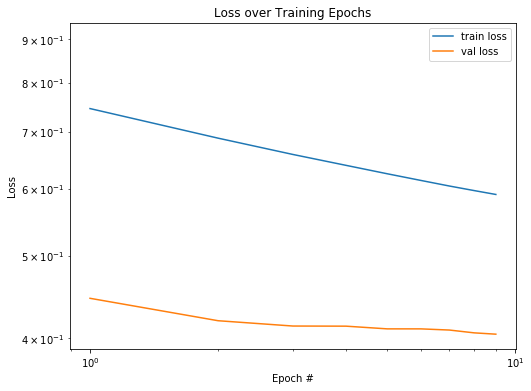

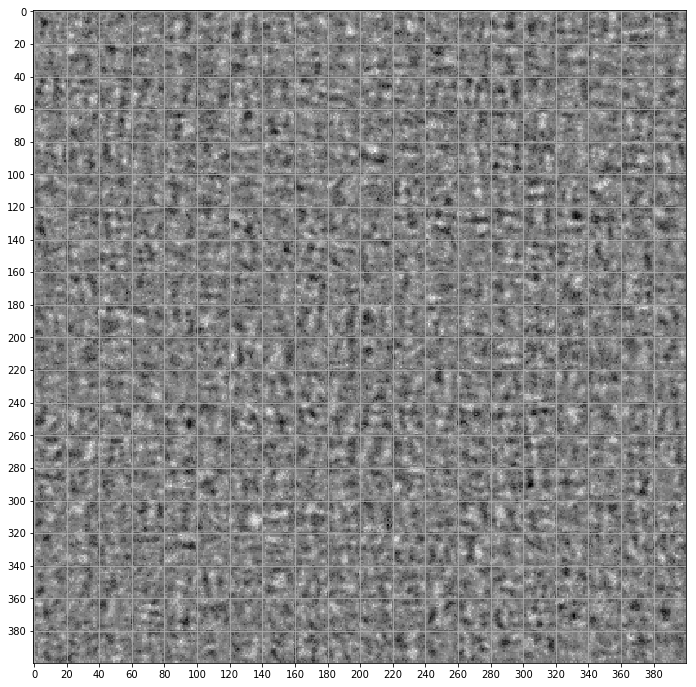

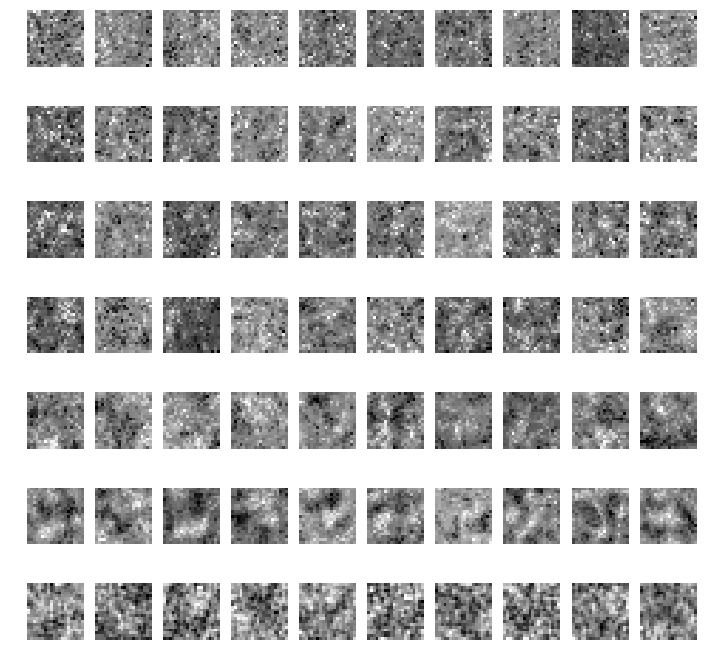

Starting training ...
Epoch 1 of 10 took 4.475s
  training cost:		0.585745
  validation cost:		0.403874
Epoch 2 of 10 took 4.303s
  training cost:		0.581261
  validation cost:		0.402920
Epoch 3 of 10 took 4.079s
  training cost:		0.577425
  validation cost:		0.402130
Epoch 4 of 10 took 4.144s
  training cost:		0.574172
  validation cost:		0.402507
Epoch 5 of 10 took 4.055s
  training cost:		0.571254
  validation cost:		0.400863
Epoch 6 of 10 took 4.191s
  training cost:		0.568610
  validation cost:		0.403032
Epoch 7 of 10 took 4.079s
  training cost:		0.566271
  validation cost:		0.401878
Epoch 8 of 10 took 4.059s
  training cost:		0.564164
  validation cost:		0.401257
Epoch 9 of 10 took 4.160s
  training cost:		0.562325
  validation cost:		0.400136
Epoch 10 of 10 took 4.178s
  training cost:		0.560523
  validation cost:		0.398847
Epoch 10 of 10 took 41.726s
  training cost:		0.560523
  validation cost:		0.398847
Total time took 41.726s


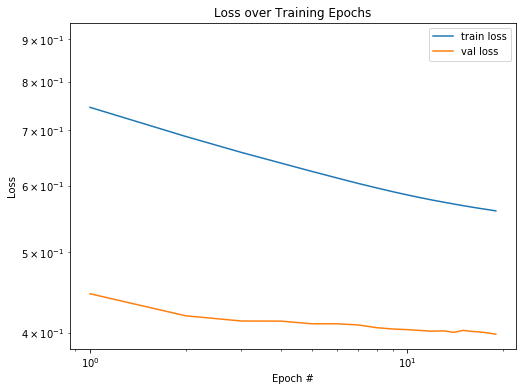

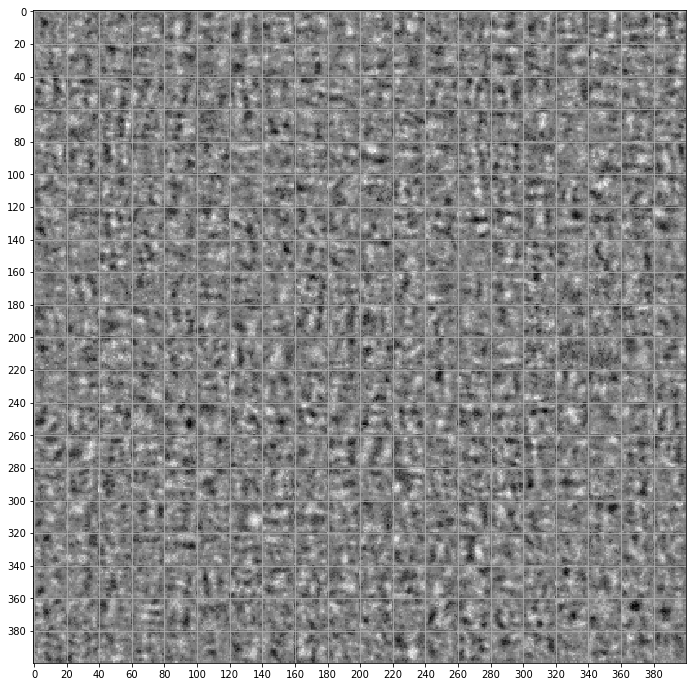

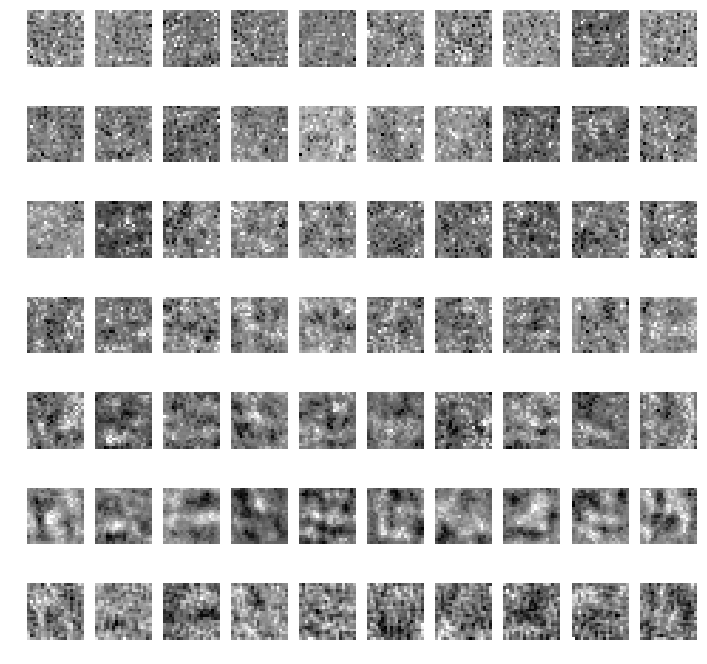

In [7]:
for ii in range(0,2):
    
    #train network
    visNet.train_network(X_train,y_train,X_val = X_val, y_val = y_val, num_epochs=100, show_graph=True)
    
    #visualise input weights
    network_params = visNet.get_network_results_and_settings()['network_params']
    vis.plot_these_vis_weights(network_params, keep_prop=0.1, tstep =-2,figsize = (12,12))
    vis.plot_vis_weights_tsteps(network_params, keep_prop=0.1,figsize = (12,12))

### Save network

In [8]:
#save python network object
visNet.to_pickle()
#save parameters and settings to .mat file
params = visNet.get_network_results_and_settings()
mat_save_path = main_save_path + 'predictive_network.mat'
sio.savemat(mat_save_path, params)

# Auditory

### Filepaths to preprocessed auditory data

In [11]:
training_data_dir = '../data/preprocessed_auditory_data/preprocessed_data.mat'
main_save_path = '../results/auditory_results/'

### Load data

In [12]:
reload(dat)
X_train, y_train, X_val, y_val = load_auditory_data(training_data_dir, t_past=40, t_future=3, numfreq=32, 
                                                    noise_ratio=0, 
                                                    input_noise_ratio=0

### Create new network

In [3]:
network_settings = {}

network_settings['model'] = 'fully_connected_nn'
network_settings['nonlinearity'] = 'sigmoid'
network_settings['num_hidden_units']= 400
network_settings['num_layers']= 1
network_settings['regularization'] = 'l1'
network_settings['reg_factor'] =  10**-3.5
network_settings['save_path'] =  main_save_path + 'python_network.pkl'
network_settings['update_func'] = 'adam'

audNet= pn.PredictiveFCN(X_train.shape, y_train.shape, **network_settings)

### Train and validate network

Starting training ...
Epoch 1 of 100 took 4.637s
  training cost:		0.145306
  validation cost:		0.173955
Epoch 2 of 100 took 4.460s
  training cost:		0.146101
  validation cost:		0.173352
Epoch 3 of 100 took 4.427s
  training cost:		0.145852
  validation cost:		0.175555
Epoch 4 of 100 took 4.431s
  training cost:		0.145732
  validation cost:		0.174029
Epoch 5 of 100 took 4.457s
  training cost:		0.145772
  validation cost:		0.175929
Epoch 6 of 100 took 4.484s
  training cost:		0.145004
  validation cost:		0.173854
Epoch 7 of 100 took 4.352s
  training cost:		0.145453
  validation cost:		0.174349
Epoch 8 of 100 took 4.486s
  training cost:		0.145458
  validation cost:		0.175133
Epoch 9 of 100 took 4.512s
  training cost:		0.145456
  validation cost:		0.173670
Epoch 10 of 100 took 4.537s
  training cost:		0.145522
  validation cost:		0.176886
Epoch 11 of 100 took 4.601s
  training cost:		0.145620
  validation cost:		0.174528
Epoch 21 of 100 took 4.385s
  training cost:		0.145221
  valida

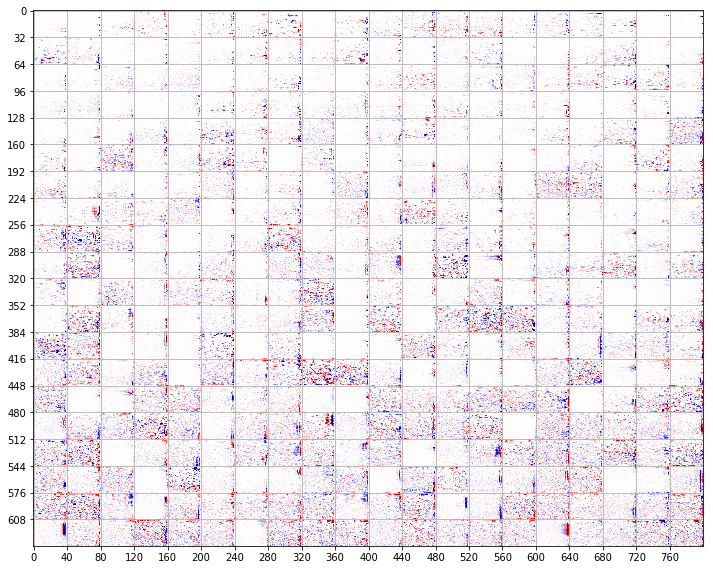

Starting training ...
Epoch 1 of 100 took 3.462s
  training cost:		0.143748
  validation cost:		0.174618
Epoch 2 of 100 took 3.454s
  training cost:		0.144201
  validation cost:		0.173021
Epoch 3 of 100 took 3.456s
  training cost:		0.143125
  validation cost:		0.174267
Epoch 4 of 100 took 3.453s
  training cost:		0.143951
  validation cost:		0.174595
Epoch 5 of 100 took 3.506s
  training cost:		0.143901
  validation cost:		0.173235
Epoch 6 of 100 took 3.449s
  training cost:		0.143355
  validation cost:		0.178035
Epoch 7 of 100 took 3.486s
  training cost:		0.143960
  validation cost:		0.173507
Epoch 8 of 100 took 3.529s
  training cost:		0.143479
  validation cost:		0.173856
Epoch 9 of 100 took 3.491s
  training cost:		0.143417
  validation cost:		0.173149
Epoch 10 of 100 took 3.506s
  training cost:		0.143553
  validation cost:		0.173267
Epoch 11 of 100 took 3.499s
  training cost:		0.144280
  validation cost:		0.173553
Epoch 21 of 100 took 3.649s
  training cost:		0.143581
  valida

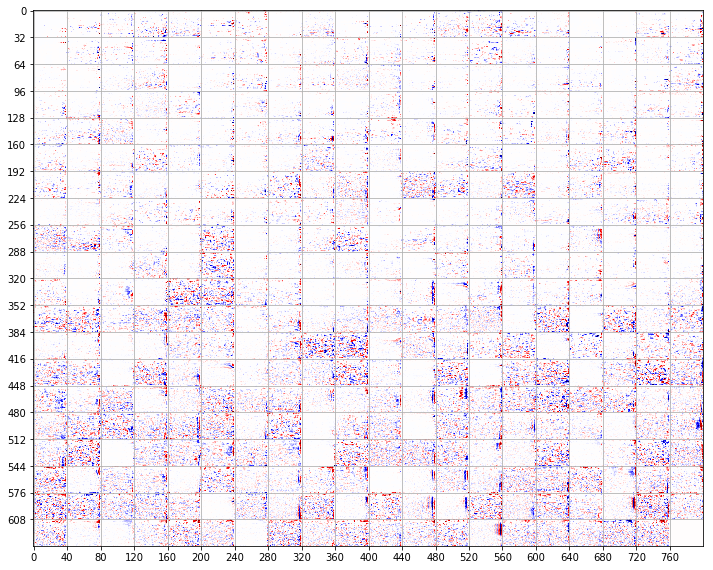

In [17]:
import scipy.io
import os
for ii in range(0,2):
    audNet.train_network(X_train,y_train,X_val = X_val, y_val = y_val, num_epochs=100, show_graph=False)
    network_params = audNet.network_params
    vis.plot_these_aud_weights(network_params, keep_prop=0.01, figsize = (12,12))    
    plt.show()

### Save network

In [29]:
#save python network object
audNet.to_pickle()

#save parameters and settings to .mat file
params = audNet.get_network_results_and_settings()
mat_save_path = main_save_path + 'predictive_network.mat'
sio.savemat(mat_save_path, params)